In [1]:
import numpy as np
import matplotlib.pyplot as plt

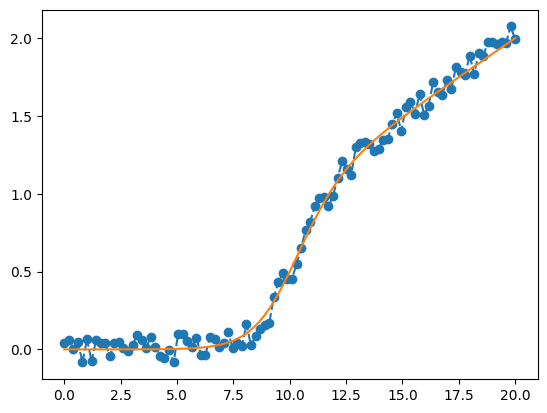

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

t = np.linspace(0,20,100)
clean_temp = temp = sigmoid((t-10))*t/10 
temp = sigmoid((t-10))*t/10 + np.random.uniform(-0.1,0.1, size=100)
plt.plot(t, temp, 'o--')
plt.plot(t, clean_temp, '-')

In [3]:
def gauss(x, m, s):
    return np.exp(-(x-m)**2/2/s**2)/np.sqrt(2*np.pi)/np.sqrt(s)

def dgauss(x, m, s):
    return -(x-m)/s * gauss(x,m,s)

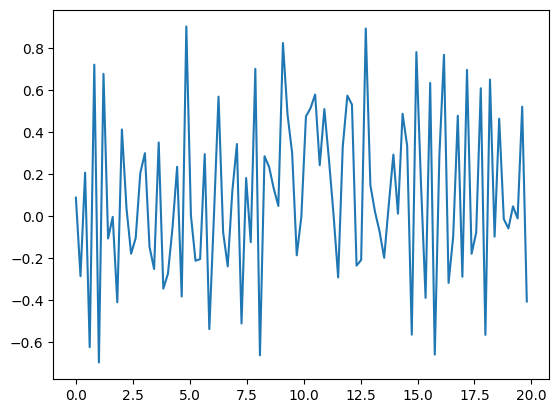

In [4]:
# derivada para ver pendientes

plt.plot(t[:-1],(temp[1:]-temp[0:-1])/(t[1:]-t[0:-1]))

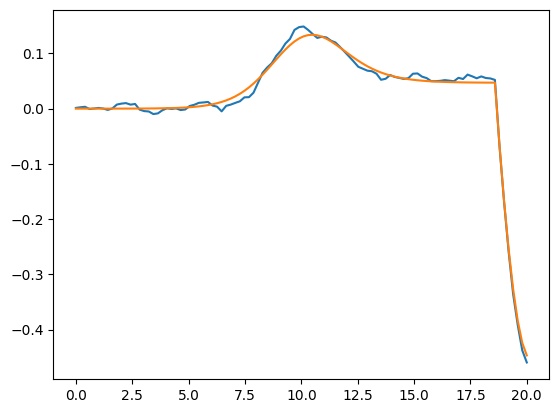

In [16]:
# suavizando para ver mejor
t_plantilla = np.linspace(-5,5, 15)
plantilla = dgauss(t_plantilla, 0, 10)
suavizada = np.convolve(plantilla,temp, mode='same')
plt.plot(t,suavizada)
plt.plot(t,np.convolve(plantilla,clean_temp, mode='same'))

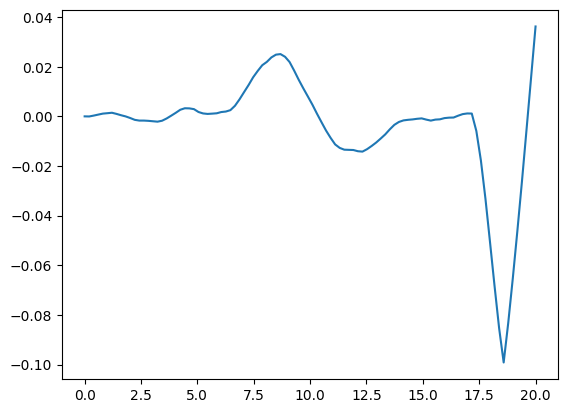

In [19]:
# derivada para ver pendientes

plt.plot(t,np.convolve(plantilla, suavizada, mode='same'))

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
df = pd.read_excel('pepe.xlsx')
df

,Place,Date,Time,T1grasa,T2este,T3cera,T4este,T5este,T6grasa,T7cera,T8grasa,T9cera,Unnamed: 12,Tamb,Tent,Tsal,Unit
0,19276.0,2023-12-01 00:00:00,09:19:36,33.5,35.7,33.8,27.7,31.4,36.3,37.3,37.4,38.5,24.850000,26.3,28.3,46.0,T12KTemp C
1,19277.0,2023-12-01 00:00:00,09:20:35,33.5,35.7,33.9,36.5,31.5,36.4,37.4,37.5,38.5,24.850000,26.8,28.3,46.0,T12KTemp C
2,19278.0,2023-12-01 00:00:00,09:21:35,33.6,35.8,33.9,36.5,28.2,36.5,37.4,37.6,38.5,24.850000,26.3,28.3,46.0,T12KTemp C
3,19279.0,2023-12-01 00:00:00,09:22:35,34.0,35.8,33.9,36.5,30.4,36.5,37.4,37.7,38.5,24.850000,26.3,28.3,46.0,T12KTemp C
4,19280.0,2023-12-01 00:00:00,09:23:35,34.3,36.0,33.9,36.5,28.9,36.6,37.5,38.0,38.5,24.850000,27.0,28.3,46.0,T12KTemp C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,19706.0,2023-12-01 00:00:00,16:29:34,57.6,49.6,49.4,52.9,46.5,60.2,53.9,58.6,54.6,52.306485,36.1,36.4,62.4,T12KTemp C
431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
times[431]

IndexError: index 431 is out of bounds for axis 0 with size 325

In [87]:
values = df.T1grasa.values
values = values[:-10]
titos = df.Time.values
import datetime
times = []
for i in range(len(titos)-10):
    times.append(titos[i].hour*3600 + titos[i].minute*60+titos[i].second)
times = np.array(times)
print(times)

[33576 33635 33695 33755 33815 33875 33935 33995 34055 34115 34175 34235
 34295 34355 34415 34475 34535 34595 34655 34715 34775 34835 34895 34955
 35015 35075 35135 35195 35255 35315 35375 35435 35495 35555 35614 35674
 35735 35795 35854 35915 35974 36034 36095 36155 36215 36275 36334 36395
 36455 36515 36575 36634 36695 36755 36815 36875 36935 36994 37055 37115
 37175 37235 37295 37354 37415 37475 37535 37595 37655 37714 37775 37835
 37894 37955 38015 38074 38134 38195 38254 38315 38375 38435 38494 38555
 38615 38675 38735 38795 38855 38915 38975 39035 39095 39155 39215 39275
 39335 39395 39455 39515 39575 39635 39695 39755 39815 39875 39935 39995
 40055 40115 40175 40235 40295 40355 40415 40475 40535 40595 40655 40715
 40775 40835 40895 40955 41015 41075 41135 41195 41255 41315 41375 41435
 41495 41555 41615 41675 41735 41795 41855 41915 41975 42035 42095 42155
 42215 42275 42335 42395 42455 42515 42575 42635 42695 42755 42815 42875
 42935 42995 43055 43115 43175 43235 43295 43355 43

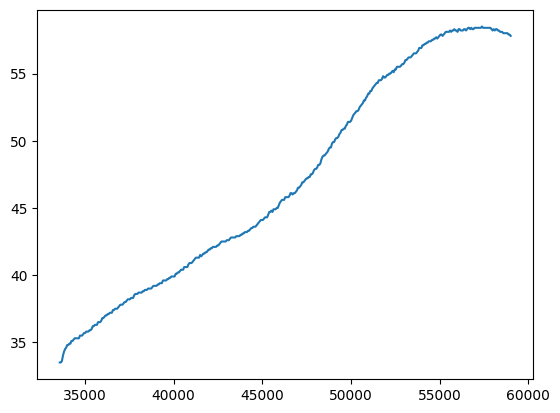

In [88]:
plt.plot(times, values)

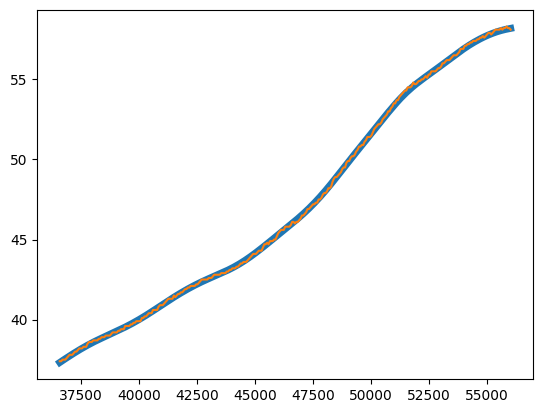

In [89]:
def gauss(x, m, s):
    return np.exp(-(x-m)**2/2/s**2)/np.sqrt(2*np.pi)/s
plantilla = gauss(np.linspace(0,100,101),50,10)
smoothed = np.convolve(values, plantilla, mode='valid')
times =times[50:-50]
values  =values[50:-50]
plt.plot(times,smoothed, lw = 5)
plt.plot(times,values)

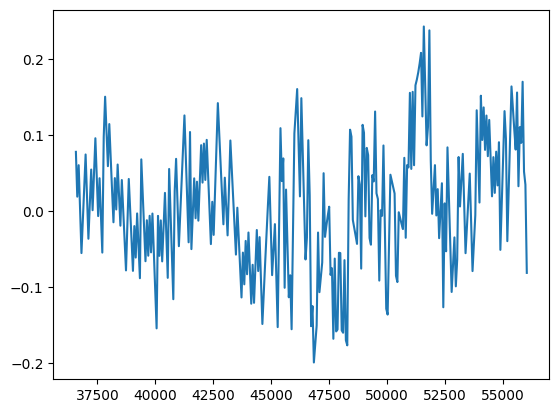

In [90]:
noise = values-smoothed
plt.plot(times,noise)

In [94]:
print(f'noise mean {noise.mean()}, noise std: {noise.std()}')
print(f'error típico estadístico: {2*noise.std():.3f} °C')

noise mean 0.007188467439230412, noise std: 0.08112399123300418
error típico estadístico: 0.162 °C


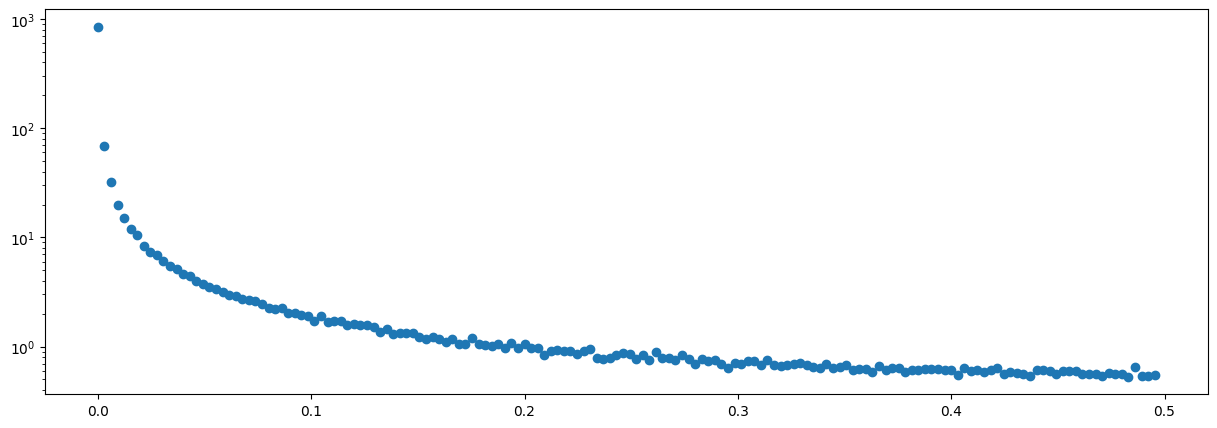

In [99]:
four = np.fft.fft(values,norm='ortho')
freqs = np.fft.fftfreq(values.shape[0], 1)
nn = len(freqs)//2
plt.figure(figsize=(15,5))
plt.semilogy(freqs[:nn], np.abs(four[:nn]), 'o')